# **The Best Neighborhood to be an Actual Panther**
![panther](https://media.giphy.com/media/MdPMINWIKCKS4/giphy.gif)

## **Introduction**

 Our project aims to find the best Pittsburgh neighborhood for a panther to live! 3 factors we came up with that would be very important for a panther's livelihood were habitat, food, and people. The first metric is the habitat metric, which finds the neighborhood with the most amount of parks/greenspaces because panthers need large amounts of space to live and explore. The second metric is deer population which measures the amount of deer crossing signs in a neighborhood in order to gauge the deer population in that area for the panther to eat. The third and final metric is population density in order to find the neighborhood with the least amount of people because people can interupt and destroy the way panthers live. Some alternatives we also considered exploring were light pollution, amount of roads, and water access. However, we could not find good datasets.

## **Lets get into it**

### **Ally's Metric - Parks**

Obviously, Panthers need trees and a habitat. Lets explore the number of parks in each neighborhood

![jungle](https://media.giphy.com/media/WzfJNYz1NL1jG/giphy.gif)



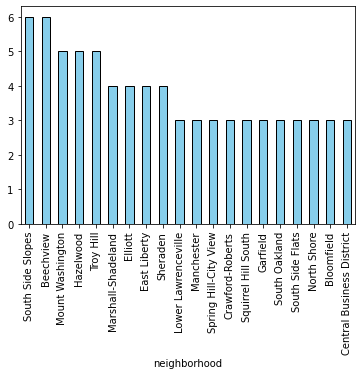

In [1]:
import pandas as pd
import geopandas
%matplotlib inline

data = pd.read_csv("data/Pittsburgh Parks.csv")

query_mask = data["type"]=="Park" 
gridcode = data[query_mask]

gridcode = gridcode.groupby("neighborhood").count()["type"].sort_values(ascending=False) ## Adds up Parks per Neighborhood

top20 = gridcode.head(20)
top20.plot(kind="bar", color="skyblue", edgecolor="black") ##Plot the top neighborhoods


Cool! What does this look like on a map

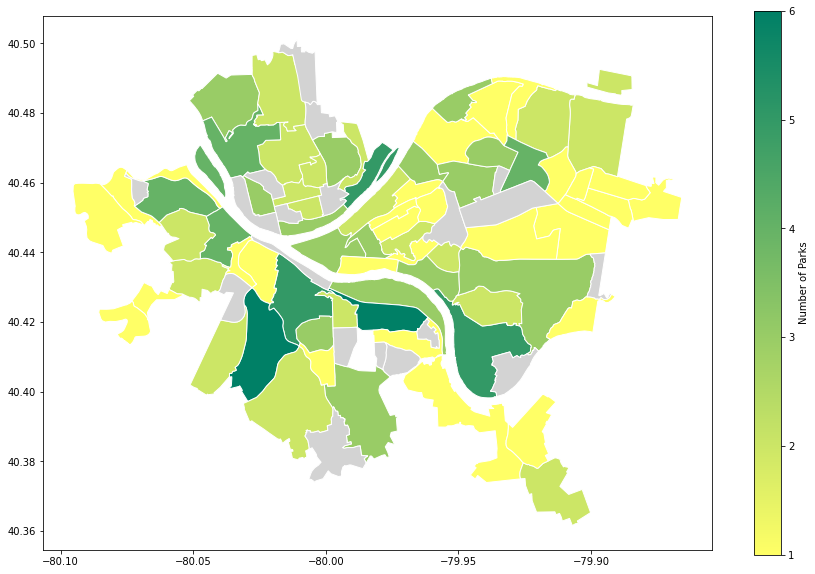

In [2]:
query_mask = data["type"]=="Park" 
gridcode = data[query_mask] 


gridcode = gridcode.groupby("neighborhood").count()["type"].sort_values(ascending=False)


parkmap = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

parkmap = parkmap.drop(columns =['objectid', 'fid_blockg', 'statefp10', 'countyfp10', 'tractce10', ##Drop unnecessary columns
       'blkgrpce10', 'geoid10', 'namelsad10', 'mtfcc10', 'funcstat10',
       'aland10', 'awater10', 'intptlat10', 'intptlon10', 'shape_leng',
       'fid_neighb', 'area', 'perimeter', 'neighbor_', 'neighbor_i',
       'hood_no', 'acres', 'sqmiles', 'dpwdiv', 'unique_id', 'sectors',
       'shape_le_1', 'shape_ar_1', 'page_numbe', 'plannerass', 'created_us',
       'created_da', 'last_edite', 'last_edi_1', 'Shape__Are', 'Shape__Len'])
parks = parkmap.merge(gridcode, how="left", left_on="hood", right_on="neighborhood")



parks.plot(column="type", cmap="summer_r", edgecolor="white", legend=True, legend_kwds={'label': 'Number of Parks'}, figsize = (15,10), 
           missing_kwds={"color":"lightgrey"}) ##Plot

### The neighborhood with the most parks are South Side Slopes and Beechview, both with 6 parks each!

### **Anika's Metric - Deer Population** 

Panthers need to eat! We tried to gauge relative deer population in the neighborhoods so that we could see where they would be able to feast and where they would have to eat scraps.

**DISCLAIMER:** This analysis assumes that the amount of deer crossing signs correlates to the deer's presence and therefore population in the area. I.e., the more deer crossing signs, the more deer there are in that neighborhood.

![deer](https://media.giphy.com/media/26gsvA7sDa86fDu6s/giphy.gif)

&nbsp;

First, let's sort through all of the traffic signs (we only need to worry about deer signs).


In [3]:
import pandas as pd
import geopandas
%matplotlib inline

#Sort through traffic sign data to eliminate any row that is not a deer sign
signs = pd.read_csv("data/trafficSigns.csv")
deer_mask = signs["description"] == "Deer"
deer_signs = signs[deer_mask]

#Count and sort by how many deer signs each neighborhood has and print out Top Ten
deer_signs = deer_signs.groupby("neighborhood").count()["description"].sort_values(ascending=False)
print("\nDeer Signs By Neighborhood:\n\n", deer_signs)


Deer Signs By Neighborhood:

 neighborhood
Squirrel Hill South    11
Perry North             7
Stanton Heights         6
Duquesne Heights        3
South Side Slopes       3
Allentown               2
Crafton Heights         2
Perry South             2
Arlington               1
Arlington Heights       1
Brookline               1
Fairywood               1
Sheraden                1
St. Clair               1
Swisshelm Park          1
Troy Hill               1
Name: description, dtype: int64


&nbsp;

Perfect! But, it would be nice to see the values and *visualize* the data...

&nbsp;


Text(0, 0.5, 'Number of Deer Crossing Signs')

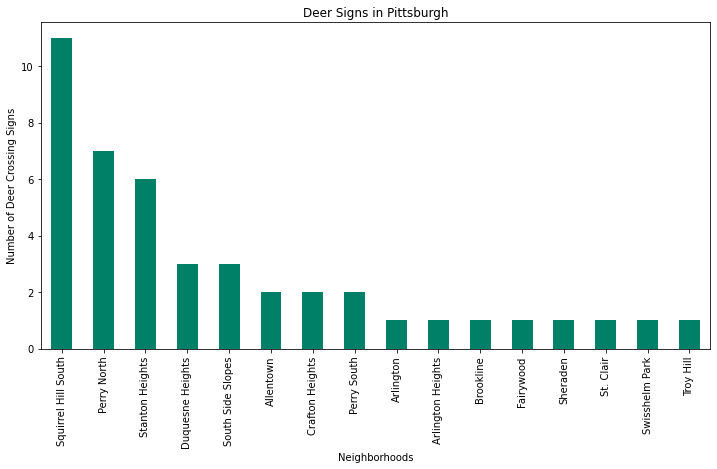

In [4]:
#Plot the results on a bar graph
chart = deer_signs.plot.bar(x="Neighborhood", y="Number of Deer Signs", colormap="summer", rot=90, figsize=(12,6))
chart.set_title("Deer Signs in Pittsburgh")
chart.set_xlabel("Neighborhoods")
chart.set_ylabel("Number of Deer Crossing Signs")

&nbsp;

Much better. But, how do we know if any of these neighborhoods overlap with the habitats we just found? If you're like me and you aren't from Pittsburgh, not many of these names mean anything to you. What if we had a map that could show us where the most deer signs are?

&nbsp;


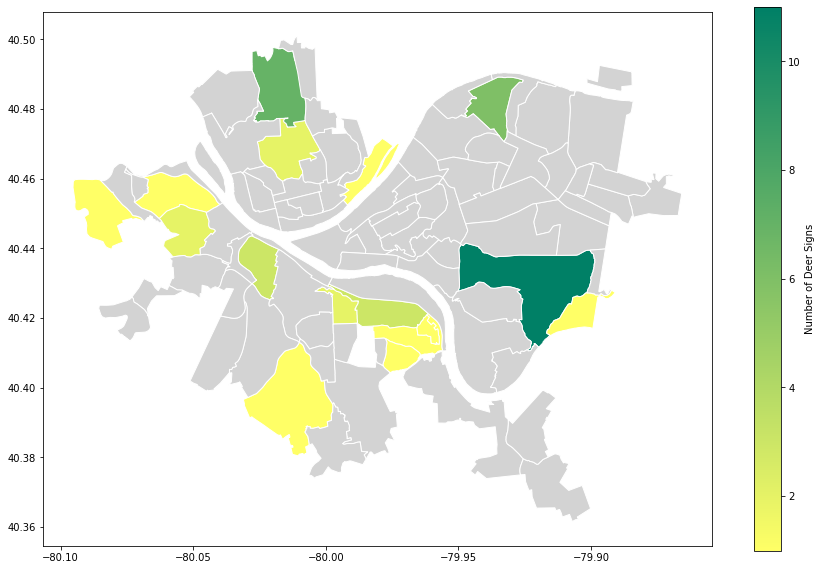

In [5]:
#Make general map, merge data
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods = neighborhoods.drop(columns=['objectid', 'fid_blockg', 'statefp10', 'countyfp10','tractce10',
       'blkgrpce10', 'geoid10', 'namelsad10', 'mtfcc10', 'funcstat10',
       'aland10', 'awater10', 'intptlat10', 'intptlon10', 'shape_leng',
       'fid_neighb', 'area', 'perimeter', 'neighbor_', 'neighbor_i',
       'hood_no', 'acres', 'sqmiles', 'dpwdiv', 'unique_id', 'sectors',
       'shape_le_1', 'shape_ar_1', 'page_numbe', 'plannerass', 'created_us',
       'created_da', 'last_edite', 'last_edi_1', 'Shape__Are', 'Shape__Len'])
deer_map = neighborhoods.merge(deer_signs, how='left', left_on='hood', right_on='neighborhood')

#Plot the chloropleth map
deer_map.plot(column='description', cmap='summer_r', edgecolor="white", legend=True, 
              legend_kwds={'label': "Number of Deer Signs"}, figsize=(15,10),
              missing_kwds={"color": "lightgrey"})

#### Conclusion

Overall, the best neighborhood to hunt deer in is by far and large, 
##### **Squirrell Hill South!**
It has about 57% more deer than any of its competition. However, Perry North and Stanton Heights still have a considerable amount with 7 deer signs total. Duquesne Heights and South Side Slopes have a few, and most of the other neighborhoods barely have any at all. 

&nbsp;


### **Tess's metric - Population Density!!**
![crowd](https://media.giphy.com/media/pKeYeFItruwG54VzlE/giphy.gif)

Believe it or not, panthers aren't fond of people! Parks can be in populus areas so we decided to explore the population density. 
I did this by exploring the population and square miles per neighborhood and calculating square miles
and printing out the top 20 least populated neighborhoods

In [6]:
import pandas as pd

area = pd.read_csv("data/neighborhoods.csv")
population = pd.read_csv("data/total-population.csv") ##Finding Files

area1 = area[["hood", "sqmiles"]].rename(columns={'hood': 'Neighborhood'})
pop1 = population[["Neighborhood", "Estimate; Total"]]

density = pd.merge(pop1, area1, on='Neighborhood')  ##Combining Columns
density['popDensity'] = density['Estimate; Total'] / density['sqmiles'] ##Calculate Population Density
density = density.sort_values(by='popDensity', ascending=True) 

density.head(25) ##Print Lowest Population Density!


,Neighborhood,Estimate; Total,sqmiles,popDensity
21,Chateau,3.0,0.382512,7.842885
70,South Shore,12.0,0.230744,52.005785
37,Hays,405.0,1.745098,232.078681
56,North Shore,205.0,0.297023,690.182126
77,St. Clair,270.0,0.311056,868.011072
66,Ridgemont,314.0,0.357649,877.956498
86,West End,235.0,0.194566,1207.817550
31,Fairywood,1181.0,0.969591,1218.039560
79,Strip District,747.0,0.608189,1228.237506
54,New Homestead,973.0,0.789972,1231.689630


Thats helpful, lets look at it in a bar graph style. I set a limit on population density and explored each of the neighboods with less than 3000 people per square mile

Text(0, 0.5, 'Population Density')

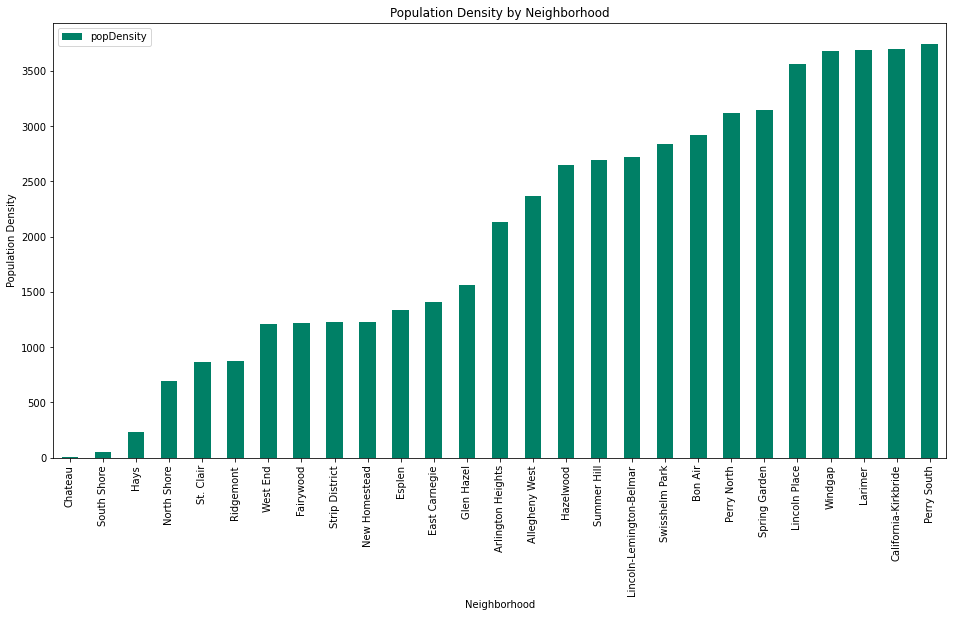

In [7]:


limit = 3800  ##Making the population density limit 3800 people per sq mile
bar_mask = density['popDensity'] < limit ##Printing everything under that limit

lowPop = density[bar_mask]

chart = lowPop.plot.bar(x="Neighborhood", y="popDensity", colormap="summer", rot=90, figsize=(16,8))

chart.set_title("Population Density by Neighborhood")
chart.set_xlabel("Neighborhood")
chart.set_ylabel("Population Density")


Alright cool! Lets look at these neighborhoods in a map format. 

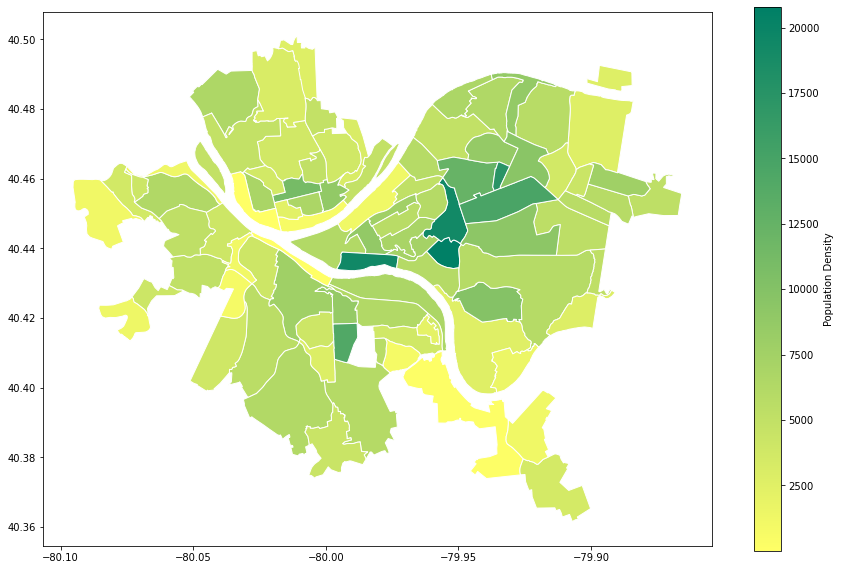

In [8]:
import geopandas
%matplotlib inline

parkmap = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
parkmap = parkmap.drop(columns=['objectid', 'fid_blockg', 'statefp10', 'countyfp10', 'tractce10',
                                'blkgrpce10', 'geoid10', 'namelsad10', 'mtfcc10', 'funcstat10',
                                'aland10', 'awater10', 'intptlat10', 'intptlon10', 'shape_leng',
                                'fid_neighb', 'area', 'perimeter', 'neighbor_', 'neighbor_i',
                                'hood_no', 'acres', 'sqmiles', 'dpwdiv', 'unique_id', 'sectors',
                                'shape_le_1', 'shape_ar_1', 'page_numbe', 'plannerass', 'created_us',
                                'created_da', 'last_edite', 'last_edi_1', 'Shape__Are', 'Shape__Len'])
parkmap.rename(columns={'hood': 'Neighborhood'}, inplace=True)


dense = parkmap.merge(density, how="left", on="Neighborhood")


dense.plot(
    column="popDensity",
    cmap="summer_r",
    edgecolor="white",
    legend=True,
    legend_kwds={'label': "Population Density"},
    figsize=(15, 10),
)

### The neighborhoods with lowest density are **Chateau and North Shore**

However, Chateau is more of a concrete jungle lets get the average population density

In [9]:
avg_density = density['popDensity'].mean()
print("Average Population:", avg_density)

Average Population: 5801.248697918518


# **Results**

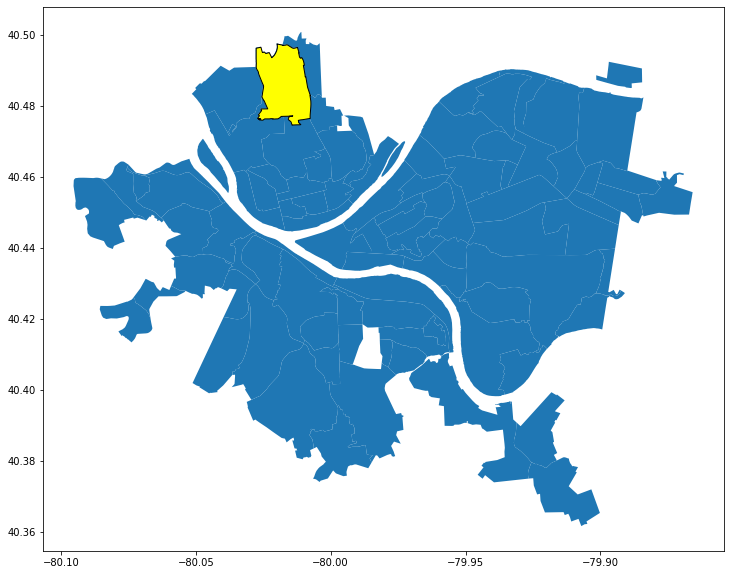

In [10]:
import geopandas
import matplotlib.pyplot as plt

%matplotlib inline

neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

neighborhoods = neighborhoods.drop(columns=[ ##Drop columns
    'objectid', 'fid_blockg', 'statefp10', 'countyfp10', 'tractce10',
    'blkgrpce10', 'geoid10', 'namelsad10', 'mtfcc10', 'funcstat10',
    'aland10', 'awater10', 'intptlat10', 'intptlon10', 'shape_leng',
    'fid_neighb', 'area', 'perimeter', 'neighbor_', 'neighbor_i',
    'hood_no', 'acres', 'sqmiles', 'dpwdiv', 'unique_id', 'sectors',
    'shape_le_1', 'shape_ar_1', 'page_numbe', 'plannerass', 'created_us',
    'created_da', 'last_edite', 'last_edi_1', 'Shape__Are', 'Shape__Len'
])


dense.plot(
    figsize=(15, 10)
)

perry_north = dense[dense['Neighborhood'] == "Perry North"]
perry_north.plot(color='yellow', edgecolor="black", legend=True, ax=plt.gca()) ##Show Plot

We looked at the top neighborhoods for deer signs, parks, and with lowest population density.


### We have determined that **Perry North** is the best neighborhood to be a panther!
### With a population density in the lower 50th percentile (3771 people per square mile), having 2 parks, and 7 deer signs,
### **Perry North** would be the best neighborhood! 🎉🎉



This neighborhood is the home of Riverview park, the fourth largest park in Pittsburgh. It is also right by a water source. No panther could thrive in a city environment, but if they HAD to, they could do it in **Perry North!**

# **Conclusion**

![panther](https://media.giphy.com/media/RK4ubVL8FwKmdpHxNg/giphy.gif)


**Ally:** My metric measured how many parks were in each Pittsburgh neighborhood, because panthers need places to run around and explore! The neighborhoods with the most amount of parks was South Side Slopes and Beechview. Based on just the amount of parks alone this would be the most ideal place for a panther to live. My personal favorite neighborhood is Squirrel Hill, it has great food and really nice movie theater! Squirrel Hill does not have a lot of parks or green spaces so it would not be an ideal neighborhood for a panther at all.

**Anika:** I am not from Pittsburgh or even Pennsylvania, so I had never heard of Perry North. I can't say if I was really suprised or not. Overall, I'd say my favorite neighborhood so far has been North Shore just because there is such a wide variety of things to do there. You can go to games, explore museums, and eat at a bunch of different restaurants that have a wide variety of options. I feel like it has a little bit of something for everyone. It is understandable though, that it wouldn't be best for a panther because it is such a hub of activity and it's pretty much one slab of concrete - so, not exactly ideal for a solitary animal.

**Tess:** I am also not from Pittsburgh. My personal favorite neightborhood is North Side because I enjoy the artsy scene. However, it is population dense and not ideal for a large predator. I also do enjoy Perry North because it is where the observatory is located. I have to go weekly for my astronomy class. Riverview park is a lovely environment and is nice to tour. I think a panther would be able to be fairly happy there because it is on the outskirts of the city. However, there is not many trees or cover. 